# Milestone 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.utils import all_estimators
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.model_selection import GridSearchCV

TASK 1.Use the PRS dataset to create a dataframe

In [2]:
# importing the dataset
df = pd.read_csv('Final.csv')

TASK 2.Check the description of the dataframe

In [3]:
# describe() gives the information about the column of dataset
df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


TASK 1.3.Check the shape of the dataframe

In [4]:
df.shape
# shows the dimention

(1101925, 16)

TASK 1.4. Check the data frame informations

In [5]:
# specifies the data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

TASK 1.5. Check for the Null values in the dataframe

In [6]:
# printing if any column contains null value
df.isnull().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64

TASK 6.Replace all the null values with "NaN"

In [7]:
# replacing the null values with Nan
df = df.fillna(np.nan)

In [8]:
# TASK 7.Change the format of date columns - "ORDER_CREATION_DATE" to datetime[64] with the format as "%Y%m%d"
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format ="%Y%m%d")
# changes the format of date 

In [9]:
# TASK 8.Do the same activity for the other date field i.e. "REQUESTED_DELIVERY_DATE" to datetime[64] with the format as "%Y%m%d"
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'],  format ="%Y%m%d")

In [10]:
# TASK 9.Sanity check - Check how many records are having order date greater than the delivery date
false_df = len(df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']])
print("Records are having order date greater than the delivery date: ",false_df)

# detecting invalid records where order date greater than the delivery date

Records are having order date greater than the delivery date:  27142


In [11]:
# TASK 10.Remove those records where order date is greater than the delivery date 
df.drop(df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']].index, inplace=True)

# removing the invalid records

In [12]:
# TASK 11.Check the number of records where the “ORDER_AMOUNT” field is having “-” in it..
dash_count = len(df[df['ORDER_AMOUNT'].str.contains("-")])
print("Number of records where “ORDER_AMOUNT” field is having '-' : ",dash_count)

Number of records where “ORDER_AMOUNT” field is having '-' :  32


In [13]:
# TASK 12.Replace “-” with “” from the “ORDER_AMOUNT” field. 
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].apply(lambda x: x.replace('-', ''))
# removing - since amount cant containn - char

In [14]:
# TASK 13. Check the number of records where the “ORDER_AMOUNT” field is having “,” in it..
comma_count = len(df[df['ORDER_AMOUNT'].str.contains(',')])
print("Number of records where “ORDER_AMOUNT” field is having ',' : ",comma_count)

Number of records where “ORDER_AMOUNT” field is having ',' :  1073406


In [15]:
# TASK 14.Replace “,” with “.” from the “ORDER_AMOUNT” field. 
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].apply(lambda x: x.replace(',','.'))

In [16]:
# TASK 15. Count the number of records where the order date and the delivery date are same
len(df[df['ORDER_CREATION_DATE'] == df['REQUESTED_DELIVERY_DATE']])

100437

In [17]:
# TASK 16. Count the number of records for each currency type by using the field “'ORDER_CURRENCY'”
df['ORDER_CURRENCY'].value_counts() 

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64

In [18]:
# TASK 17. Create a new column in the existing dataframe as “'amount_in_usd'” and convert all the non-USD currencies in USD and store them in the same column.
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].astype(float)
exchange_rates = {
    'USD':1,                                                     
    'EUR': 1.08,   
    'AUD': 0.65,    
    'CAD': 0.74,    
    'GBP': 1.24,    
    'MYR': 0.22,    
    'PLN': 0.24,    
    'AED': 0.27,   
    'HKD': 0.13,     
    'CHF': 1.11,     
    'RON': 0.22,     
    'SGD': 0.74,     
    'CZK': 0.045,     
    'HU1': 0.0029,     
    'NZD': 0.61,       
    'BHD': 2.65,      
    'SAR': 0.27,       
    'QAR': 0.27,       
    'KWD': 3.25,       
    'SEK': 0.094
}

df['amount_in_usd'] = df['ORDER_AMOUNT'] * df['ORDER_CURRENCY'].map(exchange_rates)
# converting all the amount to USD currency for better comparison

In [19]:
# TASK 18. Check for values “0” in the “'amount_in_usd” column. 
len(df[df['amount_in_usd'].isin([0])])

237821

In [20]:
# TASK 19. Create a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUMBER' and 'COMPANY_CODE'
df['unique_cust_id'] = df['CUSTOMER_NUMBER'] + df['COMPANY_CODE']

# Milestone 2

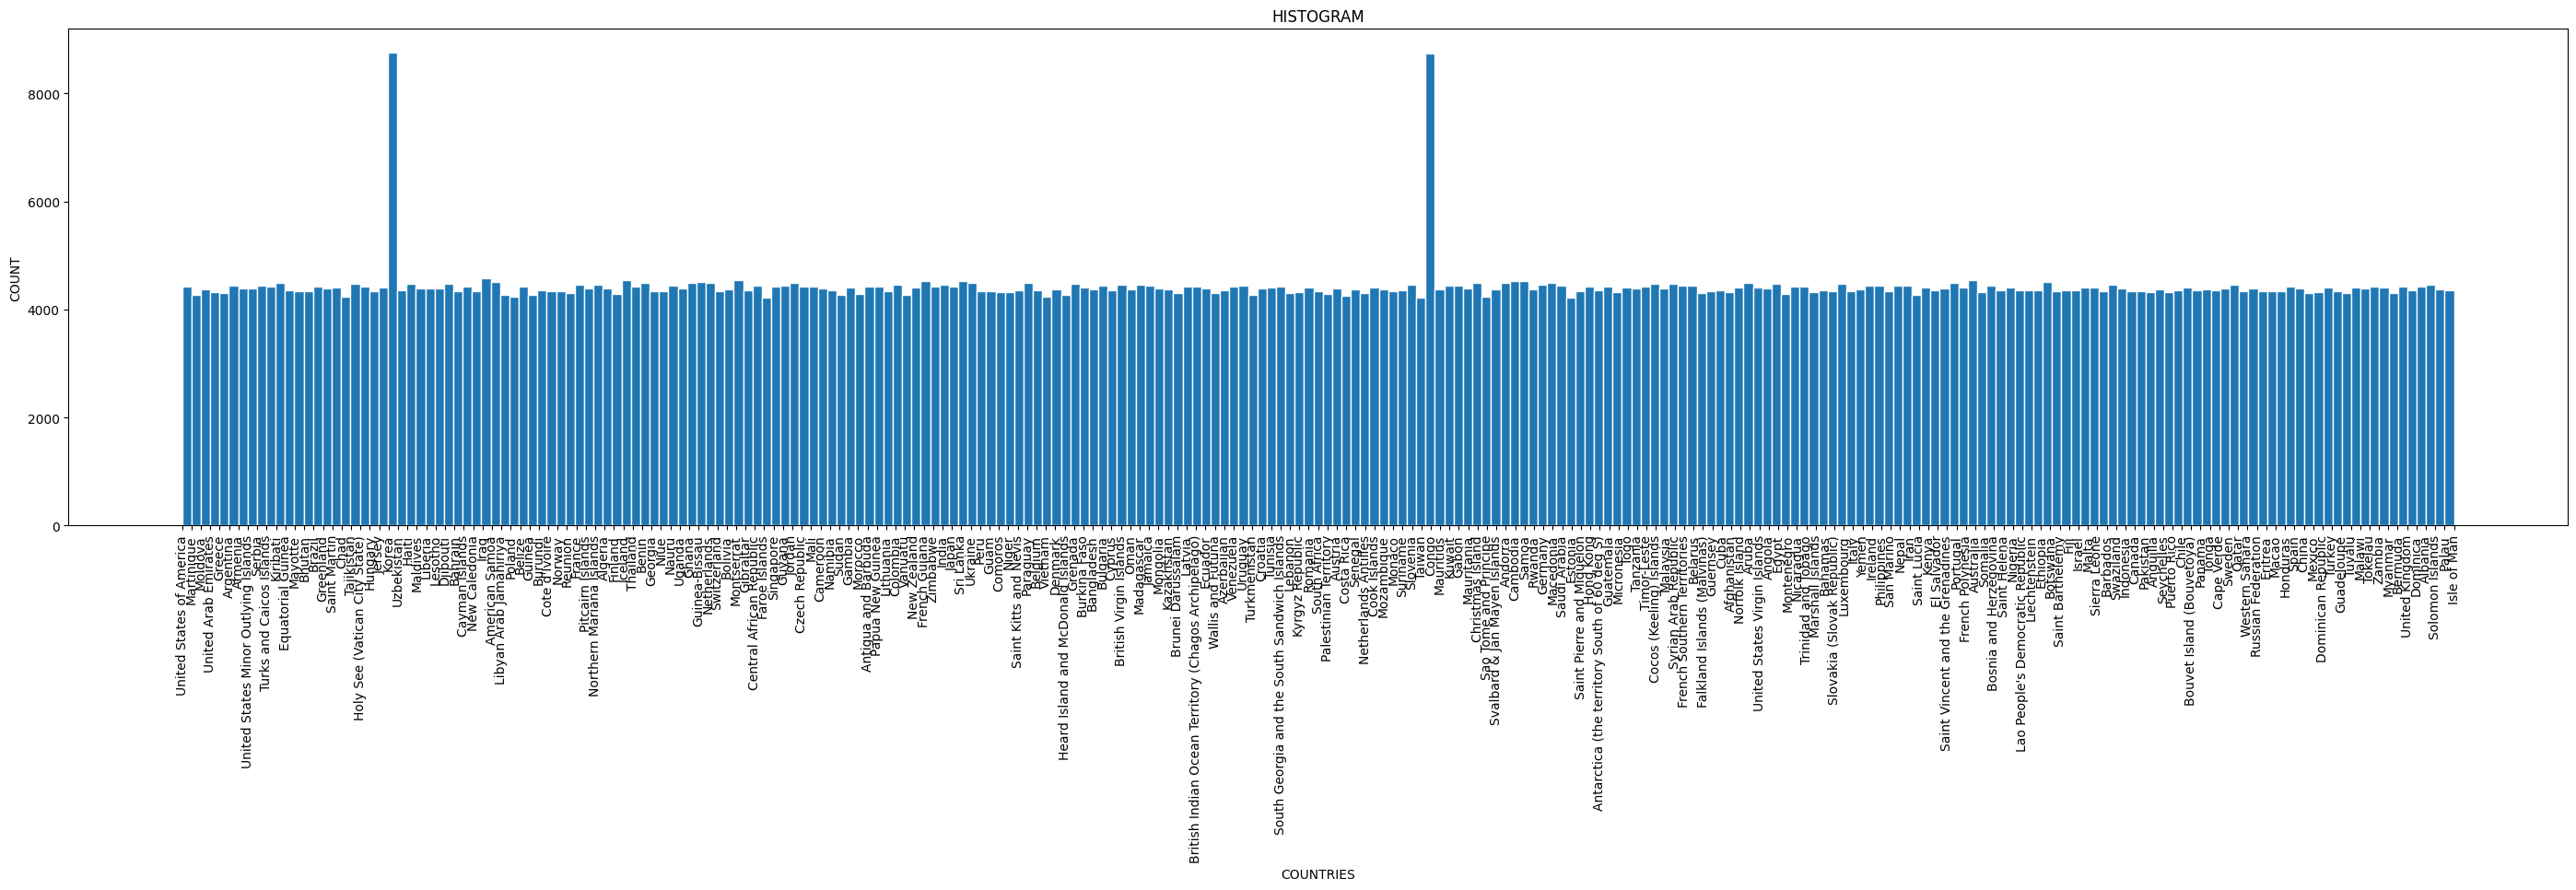

In [21]:
# TASK 1. Create a Histogram on DISTRIBUTION_CHANNEL
plt.figure(figsize=(35,7))
plt.xticks(rotation=90)
plt.title('HISTOGRAM')
plt.xlabel('COUNTRIES')
plt.ylabel('COUNT')
plt.hist(df['DISTRIBUTION_CHANNEL'], bins=243 ,ec='white')
plt.show()
# shows the count of DISTRIBUTION_CHANNEL in the dataset

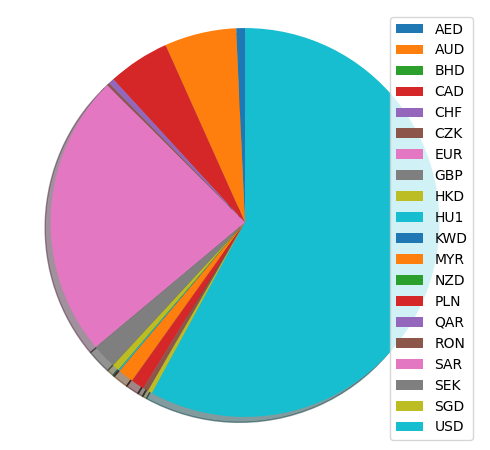

In [22]:
# TASK 2. Create a Pie Chart on ORDER_CURRENCY
df1 = df.groupby(by=['ORDER_CURRENCY'])[['CUSTOMER_ORDER_ID']].count().reset_index()
df1.rename(columns={ df1.columns[1]: 'total_num' }, inplace = True)

plt.rcParams["figure.figsize"] = [5, 5]          # for figuresize of pie chart
plt.rcParams["figure.autolayout"] = True

labels = df1['ORDER_CURRENCY'].tolist()
sizes = df1['total_num'].tolist()

patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")                 # legend add the list of currency in dataset
plt.axis('equal')

plt.show()
# shows which currency has been used more, here it is USD

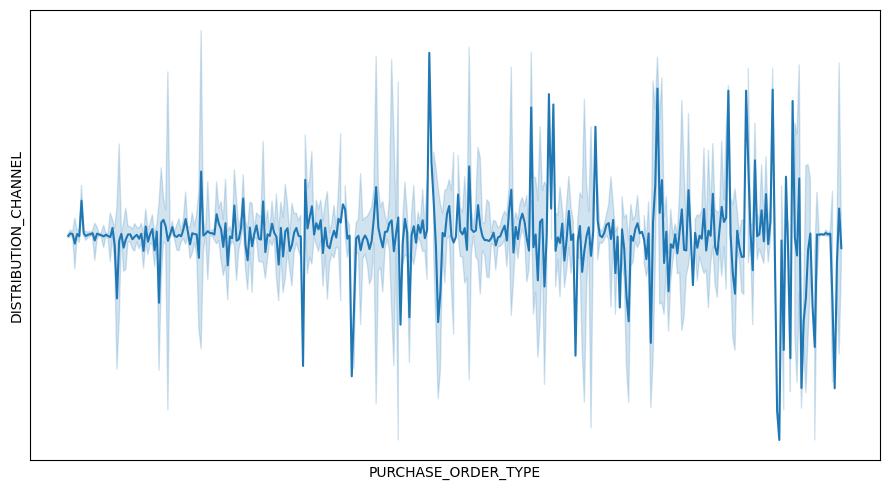

In [23]:
# TASK 2.3. Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL
plt.figure(figsize=(9, 5))

sns.lineplot(x=df['PURCHASE_ORDER_TYPE'], y=df['DISTRIBUTION_CHANNEL'], data=df)
plt.xticks([])
plt.yticks([])
plt.show()
# line chart is showing the relation between PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL

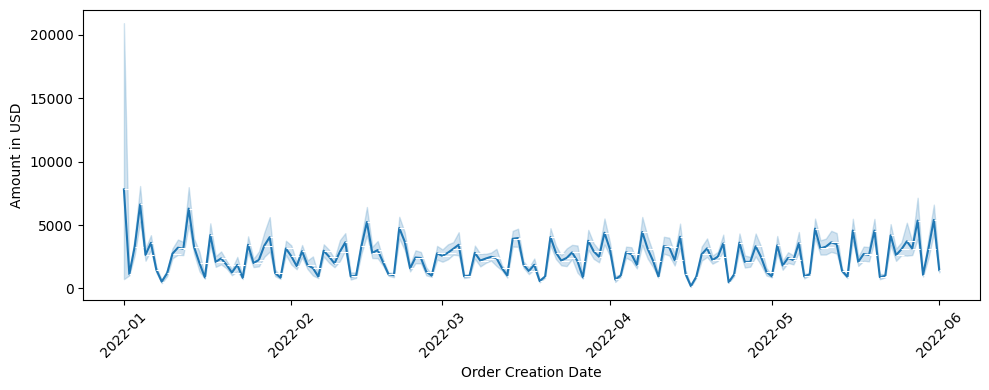

In [24]:
# TASK 2.4. Create a line plot on ORDER_CREATION_DATE and amount_in_usd
plt.figure(figsize=(10, 4))
sns.lineplot(x=df['ORDER_CREATION_DATE'], y= df['amount_in_usd'], marker=True) 
plt.xlabel('Order Creation Date')
plt.ylabel('Amount in USD')
plt.xticks(rotation=45)  
plt.show()

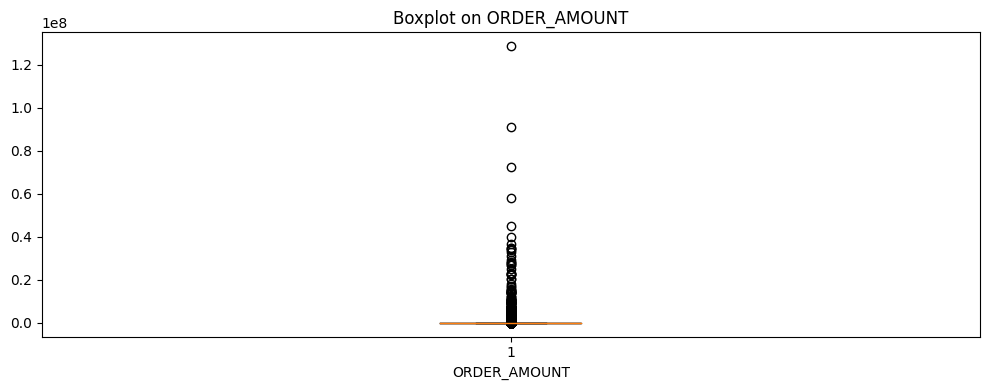

In [25]:
# TASK 2.5. Create a boxplot on ORDER_AMOUNT to find out the outliers
plt.figure(figsize=(10, 4))
plt.title("Boxplot on ORDER_AMOUNT")
plt.boxplot(df['ORDER_AMOUNT'], data=df)
plt.xlabel('ORDER_AMOUNT')
plt.show()

# boxplot mainly shows the ouliers present in the datatset

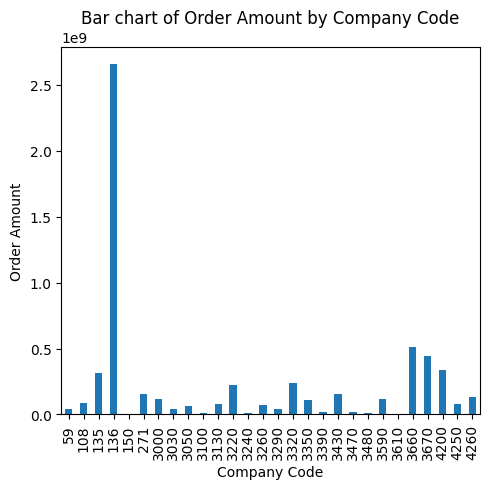

In [26]:
# TASK 2.6. Create a barchart on COMPANY_CODE and ORDER_AMOUNT
grouped_data = df.groupby('COMPANY_CODE')['ORDER_AMOUNT'].sum()
grouped_data.plot(kind='bar')

plt.xlabel('Company Code')
plt.ylabel('Order Amount')
plt.title('Bar chart of Order Amount by Company Code')
plt.show()

# Milestone 3

 TASK 3.1: Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, discussed in the sessions

In [27]:
df.describe()[['amount_in_usd']]

,amount_in_usd
count,1.074783e+06
mean,2.565421e+03
std,2.587097e+04
min,0.000000e+00
25%,1.360800e+01
50%,2.610000e+02
75%,7.320053e+02
max,3.394606e+06


{'whiskers': [<matplotlib.lines.Line2D at 0x1c09a372a30>,
 'caps': [<matplotlib.lines.Line2D at 0x1c09a4897c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c09a372d60>],
 'medians': [<matplotlib.lines.Line2D at 0x1c09fc96250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c09fc964f0>],
 'means': []}

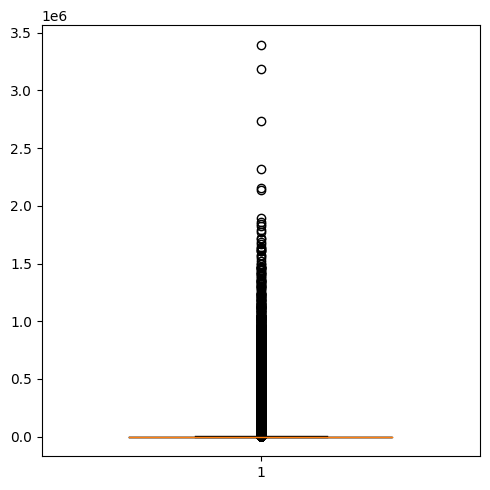

In [28]:
plt.boxplot(df['amount_in_usd'], widths = 0.6)

In [29]:
# finding outliers using Z score method

Mean = np.mean(df['amount_in_usd'])
Std = np.std(df['amount_in_usd'])
Median = df['amount_in_usd'].median()
z_scores = (df['amount_in_usd'] - Mean) / Std

outlier_threshold = 3
outliers = df[z_scores.abs() > outlier_threshold]   #len(outliers)--6086 (0.56%)

# values with z score less than 3 or more that 3 will be replaced by the median of the dataset
df.loc[z_scores.abs() > outlier_threshold, 'amount_in_usd'] = Median

# removing outliers

In [30]:
df.describe()[['amount_in_usd']]

,amount_in_usd
count,1.074783e+06
mean,1.225215e+03
std,5.099231e+03
min,0.000000e+00
25%,1.360800e+01
50%,2.610000e+02
75%,7.140306e+02
max,8.017078e+04


{'whiskers': [<matplotlib.lines.Line2D at 0x1c0a0f912b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c0a0f917f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c0a0fbafd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c0a0f91d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c0a0f91fd0>],
 'means': []}

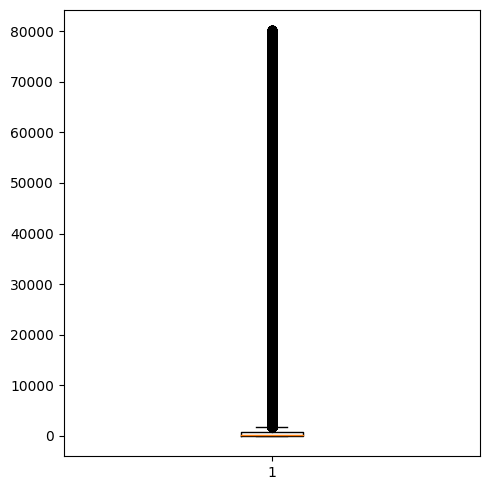

In [31]:
plt.boxplot(df['amount_in_usd'])

TASK 3.2: Label encoding or One hot Encoding on all the categorical columns 

In [32]:
from sklearn import preprocessing
categorical=[]
continuous=[]
# creating 2 list to categorize object type and int type

for x in df.columns:
    if df[x].dtypes=='object':
        categorical.append(x)
    elif (df[x].dtypes=='int64' or df[x].dtypes=='float64 '):
        continuous.append(x)

# label encoding
label_encoder = preprocessing.LabelEncoder()
for x in categorical:
    df[x] = label_encoder.fit_transform(df[x])  #can also use 1 hot encoding but it will increase the number of cold

TASK 3.3: Log Transformations on continuous columns 

In [33]:
for x in continuous:
    df[x] = np.log(df[x]+1)     # +1 in order to deal with 0 values
    # changing to log value to handle very large data

# can check from df.info() is the types have been changed or not

In [34]:
df['ORDER_AMOUNT'] = np.log(df['ORDER_AMOUNT']+1)
df['amount_in_usd'] = np.log(df['amount_in_usd']+1)
# log tranformation

TASK 3.4: Try to extract new features by grouping existing columns 

In [35]:
new_features_df=df.groupby('SALES_ORG').agg({'ORDER_AMOUNT': ['mean'],'RELEASED_CREDIT_VALUE': ['sum'],
                                          'CUSTOMER_NUMBER': ['nunique'],'amount_in_usd': ['max']}).reset_index()
# creating new relationships wrt SALES_ORG

new_features_df.columns=['SALES_ORG', 'AVG_order_amount', 'TOTAL_credit_value', 'UNIQUES_customers', 'MAX_amount_USD']
new_features_df

,SALES_ORG,AVG_order_amount,TOTAL_credit_value,UNIQUES_customers,MAX_amount_USD
0,7.650169,4.495421,609429,141,11.263324
1,7.650645,4.764598,723167,129,10.905561
2,7.651120,4.760109,594668,116,11.008478
3,7.651596,4.693573,667986,124,11.093886
4,7.652071,4.564189,806552,137,11.133267
...,...,...,...,...,...
2406,8.413387,4.887688,613023,143,10.751693
2407,8.413609,4.784492,620833,122,11.084786
2408,8.413831,4.789962,775251,139,11.281178
2409,8.414052,4.757516,487248,146,10.749257


TASK 3.5: Create a heatmap to find correlation between the columns

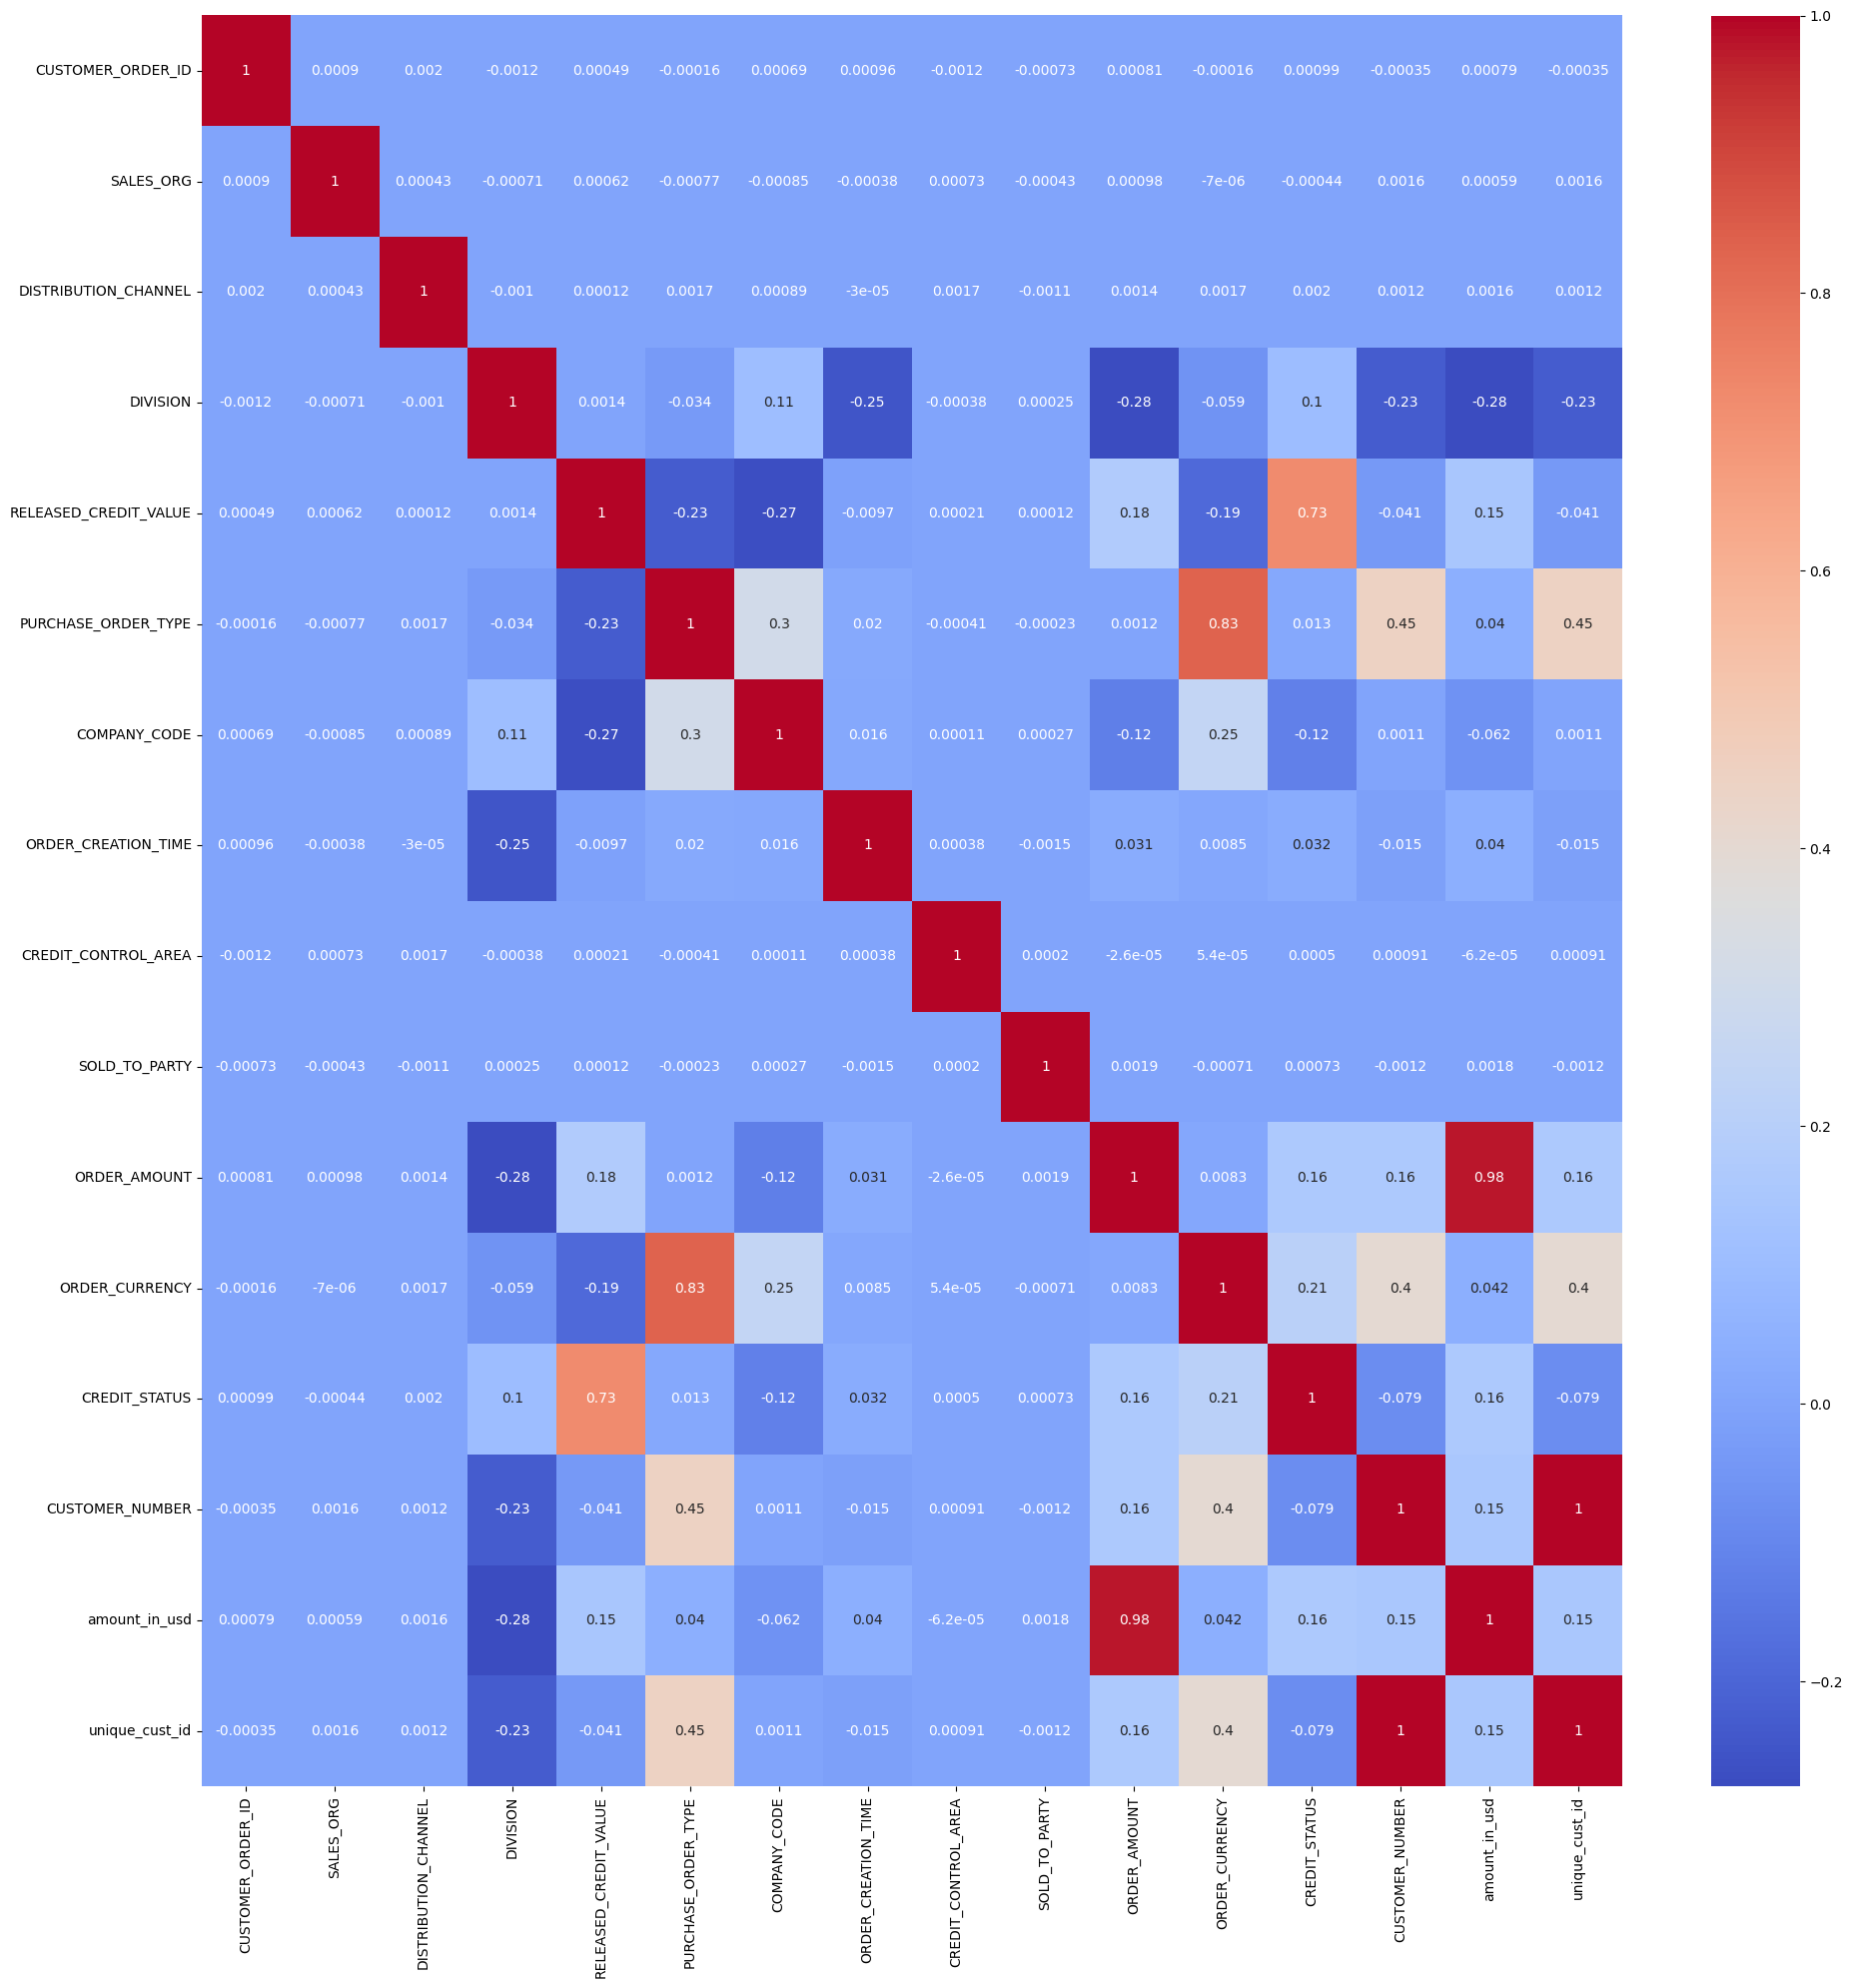

In [36]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()
# will shows how strongly a feature is related to other columns
# more is the abs() value, more strongly related

TASK 5.6: Try to identify important or relevant columns for feature extraction

In [37]:
correlation_matrix = df.corr()

# Find the pairs of strongly correlated columns
correlated_pairs = []    # will store the pair of correlated features

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > 0.7:                       # greater than 0.7 is strongly correlated 
            correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Print the correlated column pairs
for pair in correlated_pairs:
    print(pair)

('RELEASED_CREDIT_VALUE', 'CREDIT_STATUS')
('PURCHASE_ORDER_TYPE', 'ORDER_CURRENCY')
('ORDER_AMOUNT', 'amount_in_usd')
('CUSTOMER_NUMBER', 'unique_cust_id')


# DATE MANIPULATION

In [38]:
def difference_in_days(melt, lags, ffday, customer_id_col, create_date_col, net_amount_col):
    for i in range(ffday, lags+1):
        melt['Last-'+str(i)+'day_Sales'] = melt.groupby([customer_id_col])[net_amount_col].shift(i)
    
    melt = melt.reset_index(drop = True)
    
    for i in range(ffday, lags+1):
        melt['Last-'+str(i)+'day_Diff']  = melt.groupby([customer_id_col])['Last-'+str(i)+'day_Sales'].diff()
    melt = melt.fillna(0)
    return melt

# Understanding the variables used above
# melt            -> input dataFrame that contains the data
# lags            -> number of lagged time periods to consider
# ffday           -> first day to start the calculation
# customer_id_col -> column name representing the customer ID
# create_date_col -> column name representing the creation date
# net_amount_col  -> column name representing the net amount of sales


# Call the difference_in_days function
lags = 7
ffday = 1
customer_id_col = 'unique_cust_id'
create_date_col = 'ORDER_CREATION_DATE'
net_amount_col = 'amount_in_usd'

df = difference_in_days(df, lags, ffday, customer_id_col, create_date_col, net_amount_col)

# Milestone 4

In [39]:
#    ADDED CODE FOR F2F
df.head(10)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,Last-5day_Sales,Last-6day_Sales,Last-7day_Sales,Last-1day_Diff,Last-2day_Diff,Last-3day_Diff,Last-4day_Diff,Last-5day_Diff,Last-6day_Diff,Last-7day_Diff
0,20.668653,8.171317,232,1,1,0,8.077447,2022-01-01,10.669258,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.686013,8.146130,135,1,1,0,8.077447,2022-01-01,10.671626,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20.694858,8.083020,141,1,43496,204,8.089789,2022-01-01,11.608417,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.441367,8.271804,228,1,7852,255,8.098947,2022-01-01,11.938285,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20.650968,7.775696,82,1,1,255,8.098947,2022-01-01,11.983060,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,20.524500,8.190354,9,1,1,270,8.098947,2022-01-01,11.983079,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,20.596971,8.201386,10,0,1,291,8.152198,2022-01-02,11.608445,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,20.526837,7.812378,232,1,1,56,8.077447,2022-01-02,11.775482,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,20.679518,8.055475,230,1,1,264,8.098947,2022-01-02,11.798217,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,20.507994,8.130648,193,1,39013,264,8.098947,2022-01-02,11.798217,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# sorting according to order creation date 
df.sort_values(by='ORDER_CREATION_DATE', inplace = True)

In [42]:
#    ADDED CODE FOR F2F

df.head(10)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,Last-5day_Sales,Last-6day_Sales,Last-7day_Sales,Last-1day_Diff,Last-2day_Diff,Last-3day_Diff,Last-4day_Diff,Last-5day_Diff,Last-6day_Diff,Last-7day_Diff
0,20.668653,8.171317,232,1,1,0,8.077447,2022-01-01,10.669258,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
984574,20.718806,8.177516,24,1,1,156,8.016648,2022-01-01,12.100795,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
984575,20.582994,8.020928,139,1,1,156,8.016648,2022-01-01,12.100807,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
984576,20.625670,8.129175,49,1,1,156,8.016648,2022-01-01,12.100812,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
984577,20.505352,7.703459,238,1,1,156,8.016648,2022-01-01,12.100807,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
984578,20.619396,8.038835,10,1,1,156,8.016648,2022-01-01,12.100890,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
984579,20.703245,7.927324,19,1,1,156,8.016648,2022-01-01,12.100929,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
984580,20.689161,8.255828,7,1,1,156,8.016648,2022-01-01,12.101023,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
984581,20.706492,8.400210,215,1,1,156,8.016648,2022-01-01,12.101295,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
984596,20.533426,8.012350,51,0,1,104,8.006701,2022-01-01,11.051001,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


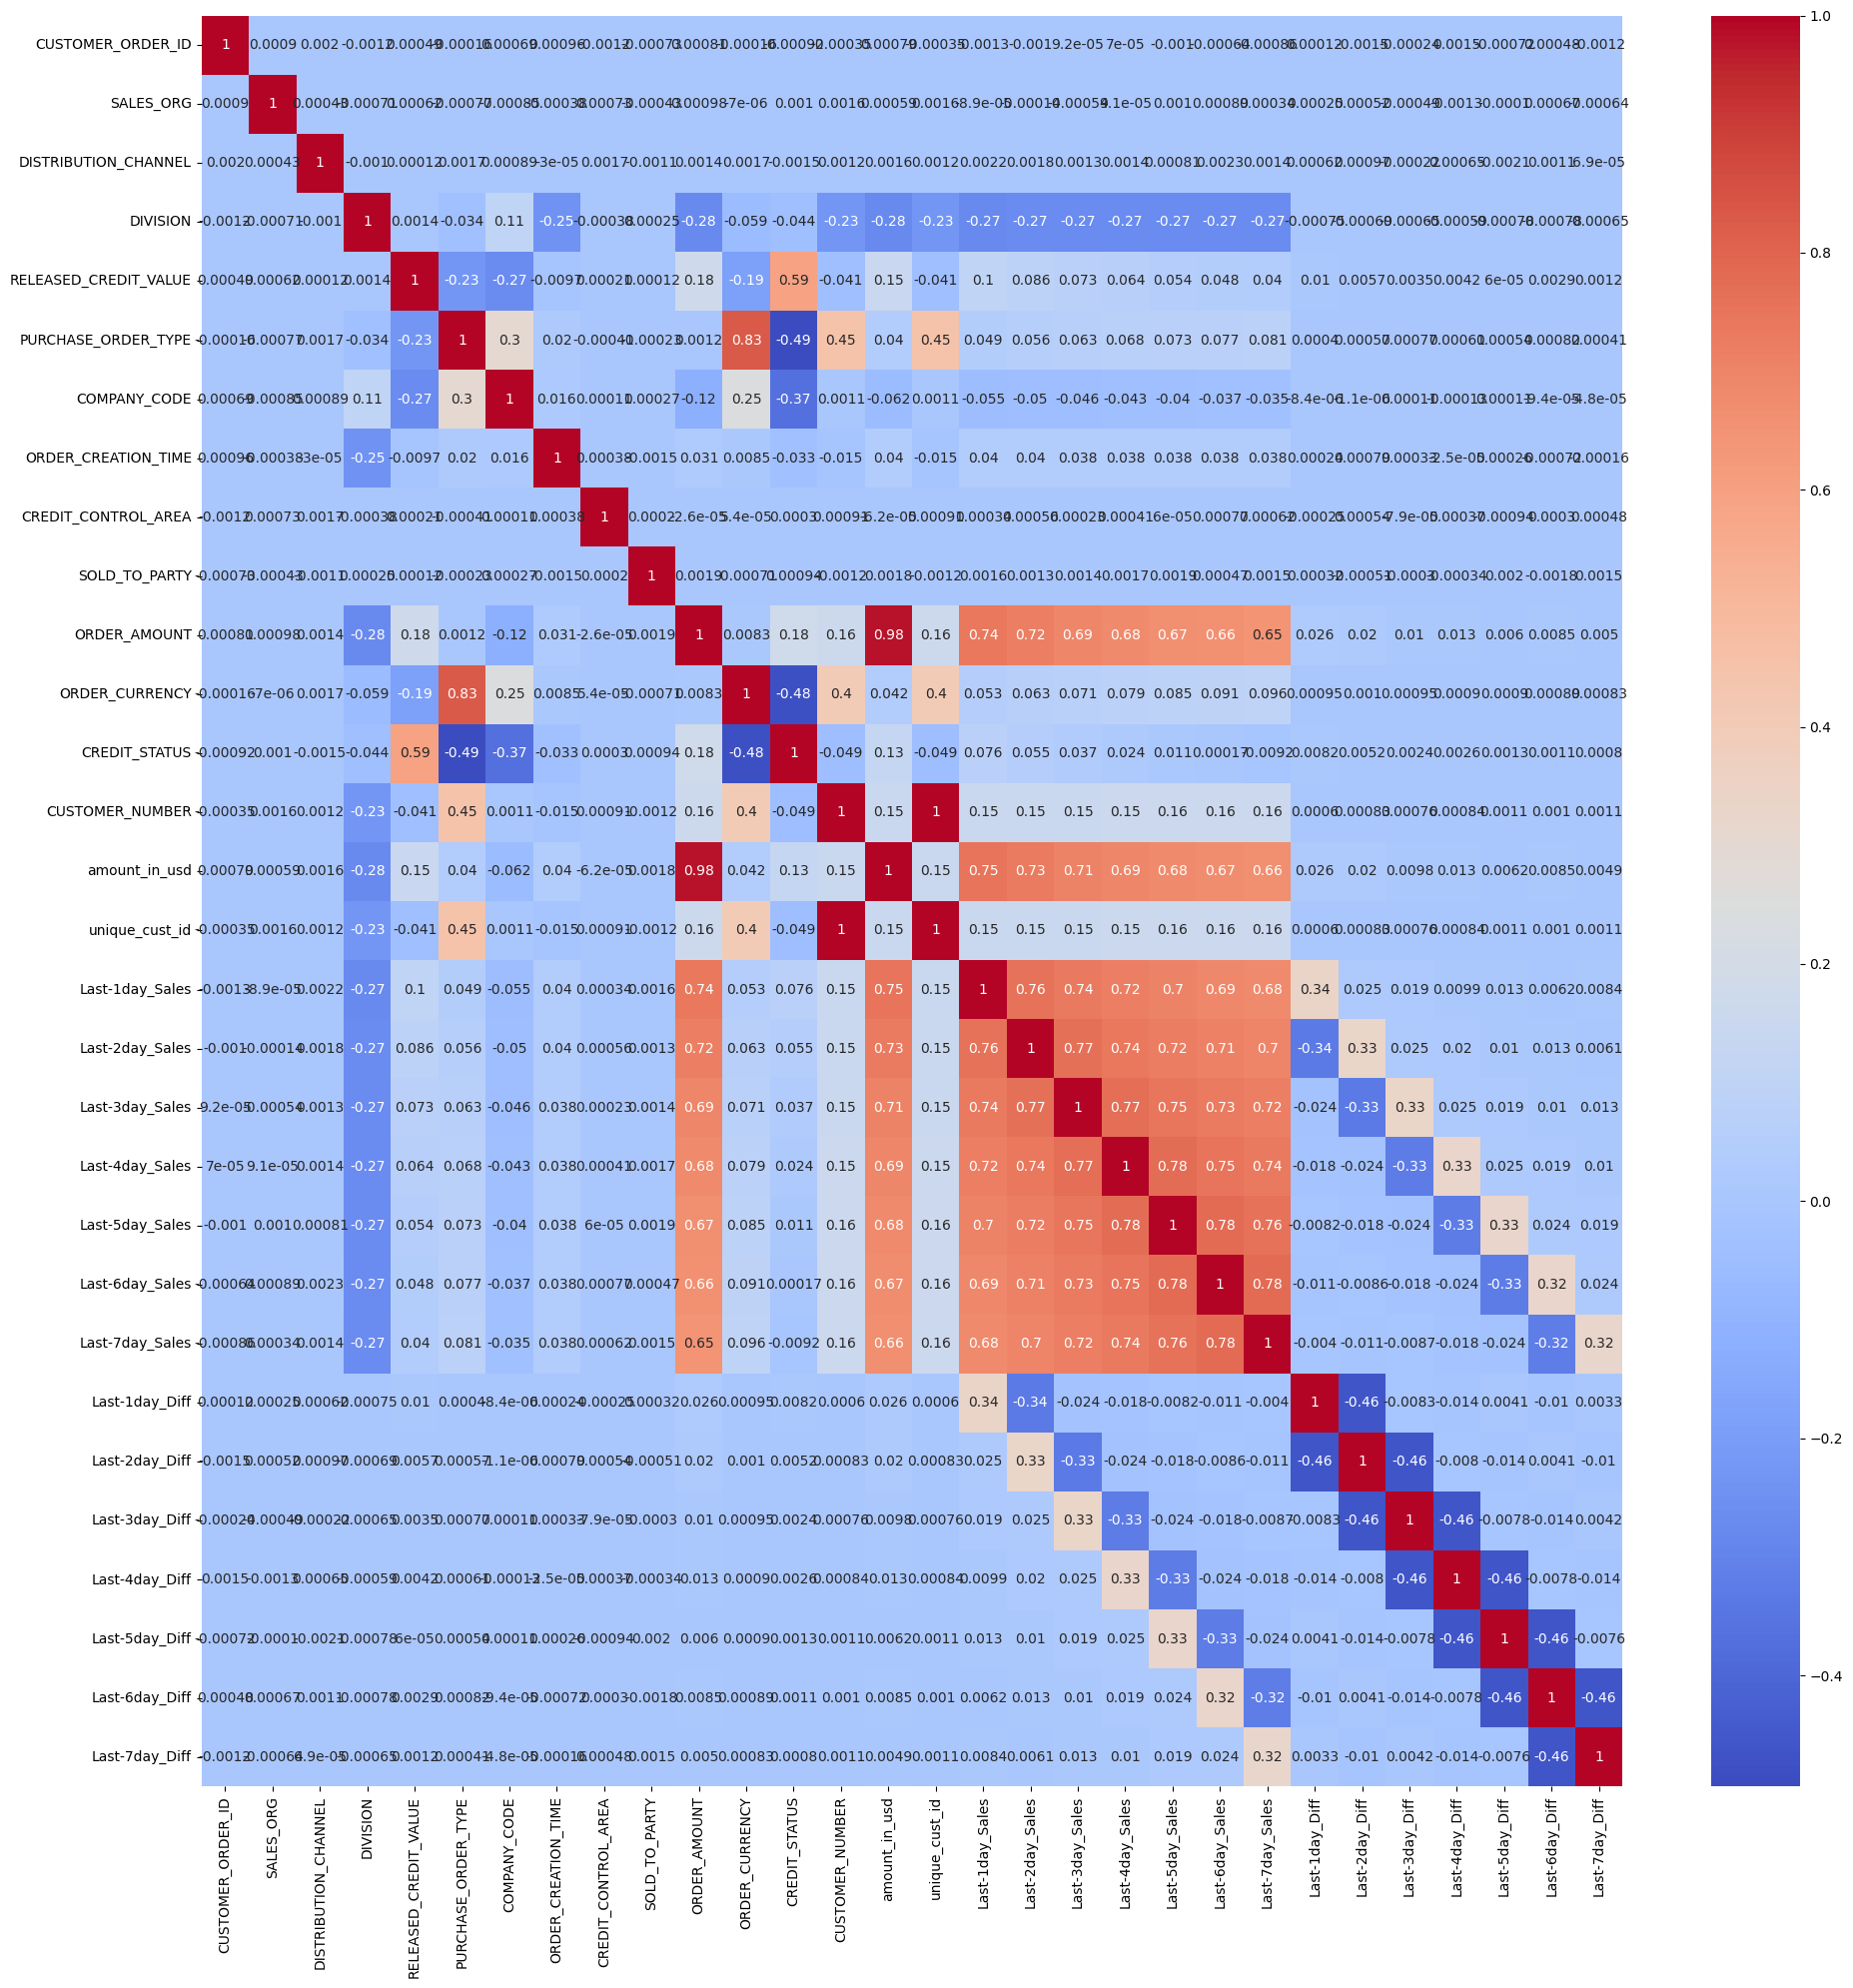

In [44]:
#    ADDED CODE FOR F2F

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

TASK 4.1: Modify the dataset to pass into any type of machine learning models. 

In [45]:
df.drop(['CUSTOMER_ORDER_ID','DISTRIBUTION_CHANNEL','ORDER_CREATION_DATE','SALES_ORG','DIVISION','ORDER_CREATION_TIME',
         'Last-1day_Diff','Last-2day_Diff','REQUESTED_DELIVERY_DATE','Last-3day_Diff','Last-4day_Diff',
         'Last-5day_Diff','Last-6day_Diff','ORDER_AMOUNT','Last-7day_Diff','CREDIT_CONTROL_AREA','SOLD_TO_PARTY',]
        ,inplace=True,axis=1)

# dropping the columns that are not influencing the amount_in_usd value

In [46]:
df.head(5)

,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id,Last-1day_Sales,Last-2day_Sales,Last-3day_Sales,Last-4day_Sales,Last-5day_Sales,Last-6day_Sales,Last-7day_Sales
0,1,0,8.077447,6,0.0,16.326069,6.939233,16.326331,0.0,0.0,0.0,0.0,0.0,0.0,0.0
984574,1,156,8.016648,8,0.0,20.914307,5.829828,20.914310,0.0,0.0,0.0,0.0,0.0,0.0,0.0
984575,1,156,8.016648,8,0.0,20.914242,6.635034,20.914245,0.0,0.0,0.0,0.0,0.0,0.0,0.0
984576,1,156,8.016648,8,0.0,20.914224,6.668066,20.914227,0.0,0.0,0.0,0.0,0.0,0.0,0.0
984577,1,156,8.016648,8,0.0,20.914242,7.035867,20.914245,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
X=df.drop('amount_in_usd',axis=1)
# taking all feature except target features

In [48]:
y = df['amount_in_usd']   # target feature

In [49]:
X_train = X.iloc[0:859826]
X_test = X.iloc[859826:]
y_train = y.iloc[0:859826]
y_test = y.iloc[859826:]

# spliting the data 80:20 by index location

In [44]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# random_state=0, shuffle=False

TASK 4.2: Try different machine learning models like - 

LINEAR REGRESSION

In [50]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model = lr_model.fit(X_train, y_train)     #will train the model with xtrain and y train
y_pred = lr_model.predict(X_test)           # and predict on the xtest and store values in ypred

mse_LG = mean_squared_error(y_test, y_pred)    # calculating mean square error
rmse_LG = np.sqrt(mse_LG)                    # calculating root mean square error
r2_LG = r2_score(y_test, y_pred)                   # calculating R score value

# if r2 is 1 then perfect model

DECISION TREE

In [52]:
from sklearn.tree import DecisionTreeRegressor

clf_model = DecisionTreeRegressor(max_depth=10, random_state =42)
clf_model.fit(X_train,y_train)
# Make predictions on the testing data
y_pred = clf_model.predict(X_test)

mse_CLF = mean_squared_error(y_test, y_pred)
rmse_CLF = np.sqrt(mse_CLF)
r2_CLF = r2_score(y_test, y_pred)

ADABOOST

In [53]:
from sklearn.ensemble import AdaBoostRegressor

ada_model = AdaBoostRegressor()
ada_model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = ada_model.predict(X_test)

mse_ADA = mean_squared_error(y_test, y_pred)
rmse_ADA = np.sqrt(mse_ADA)
r2_ADA= r2_score(y_test, y_pred)

RANDOM FOREST

In [54]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

mse_RF = mean_squared_error(y_test, y_pred)
rmse_RF = np.sqrt(mse_RF)
r2_RF = r2_score(y_test, y_pred)

XGBOOST

In [55]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [56]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = xgb_model.predict(X_test)

mse_XGB = mean_squared_error(y_test, y_pred)
rmse_XGB = np.sqrt(mse_XGB)
r2_XGB = r2_score(y_test, y_pred)

SUPPORT VECTOR

In [57]:
from sklearn.svm import LinearSVR

svr_model = LinearSVR()
svr_model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = svr_model.predict(X_test)

mse_SVR = mean_squared_error(y_test, y_pred)
rmse_SVR = np.sqrt(mse_SVR)
r2_SVR = r2_score(y_test, y_pred)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


TASK 4.3: Perform Regression model evaluations like MSE, RMSE, R-Square 

In [58]:
# printing the mse, rmse and r2 value for the algorithms used and comparing them
print("LINEAR REGRESSION")
print("------------------------------------------------")
print("Mean Squared Error (MSE):", mse_LG)
print("Root Mean Squared Error (RMSE):", rmse_LG)
print("R-squared (R2) Score:", r2_LG)
print("------------------------------------------------")
print("DECISION TREE")
print("------------------------------------------------")
print("Mean Squared Error (MSE):", mse_CLF)
print("Root Mean Squared Error (RMSE):", rmse_CLF)
print("R-squared (R2) Score:", r2_CLF)
print("------------------------------------------------")
print("ADABOOST")
print("------------------------------------------------")
print("Mean Squared Error (MSE):", mse_ADA)
print("Root Mean Squared Error (RMSE):", rmse_ADA)
print("R-squared (R2) Score:", r2_ADA)
print("------------------------------------------------")
print("RANDOM FOREST TREE")
print("------------------------------------------------")
print("Mean Squared Error (MSE):", mse_RF)
print("Root Mean Squared Error (RMSE):", rmse_RF)
print("R-squared (R2) Score:", r2_RF)
print("------------------------------------------------")
print("XGBOOST")
print("------------------------------------------------")
print("Mean Squared Error (MSE):", mse_XGB)
print("Root Mean Squared Error (RMSE):", rmse_XGB)
print("R-squared (R2) Score:", r2_XGB)
print("------------------------------------------------")
print("SUPPORT VECTOR")
print("------------------------------------------------")
print("Mean Squared Error (MSE):", mse_SVR)
print("Root Mean Squared Error (RMSE):", rmse_SVR)
print("R-squared (R2) Score:", r2_SVR)
print("------------------------------------------------")

LINEAR REGRESSION
------------------------------------------------
Mean Squared Error (MSE): 2.242740676355581
Root Mean Squared Error (RMSE): 1.497578270527314
R-squared (R2) Score: 0.7330121268214187
------------------------------------------------
DECISION TREE
------------------------------------------------
Mean Squared Error (MSE): 1.9831589803531515
Root Mean Squared Error (RMSE): 1.4082467753746684
R-squared (R2) Score: 0.7639141235000528
------------------------------------------------
ADABOOST
------------------------------------------------
Mean Squared Error (MSE): 3.8485970241668013
Root Mean Squared Error (RMSE): 1.9617841431122847
R-squared (R2) Score: 0.5418423783736649
------------------------------------------------
RANDOM FOREST TREE
------------------------------------------------
Mean Squared Error (MSE): 1.9275027810300875
Root Mean Squared Error (RMSE): 1.388345339254642
R-squared (R2) Score: 0.7705397358337153
------------------------------------------------
XGB

TASK 4.4: Compare the accuracies of all the models 

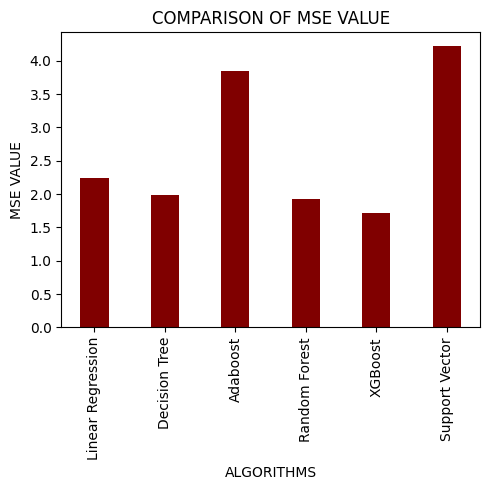

In [59]:
# MSE VALUE
# creating bar plot to compare the mse value of all algorithms
data = {'Linear Regression':mse_LG, 'Decision Tree':mse_CLF, 'Adaboost':mse_ADA,
        'Random Forest':mse_RF, 'XGBoost':mse_XGB, 'Support Vector':mse_SVR}

names = list(data.keys())
values = list(data.values())
  
#fig = plt.figure(figsize = (10, 5))
plt.bar(names, values, color ='maroon', width = 0.4)
plt.xticks(rotation=90)
plt.xlabel("ALGORITHMS")
plt.ylabel("MSE VALUE")
plt.title("COMPARISON OF MSE VALUE")
plt.show()

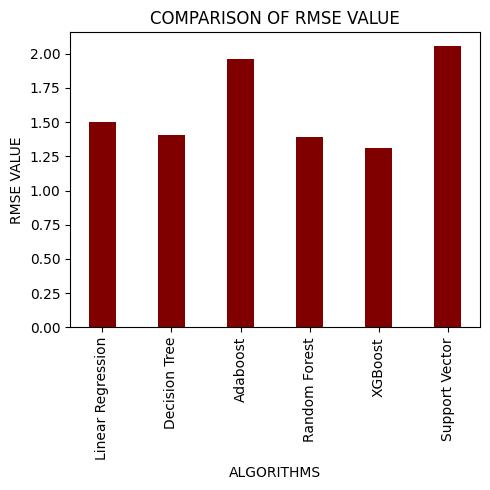

In [60]:
# RMSE VALUE
# creating bar plot to compare the rmse value of all algorithms
data = {'Linear Regression':rmse_LG, 'Decision Tree':rmse_CLF, 'Adaboost':rmse_ADA,
        'Random Forest':rmse_RF, 'XGBoost':rmse_XGB, 'Support Vector':rmse_SVR}

names = list(data.keys())
values = list(data.values())
  
plt.xticks(rotation=90)
plt.bar(names, values, color ='maroon', width = 0.4)
plt.xlabel("ALGORITHMS")
plt.ylabel("RMSE VALUE")
plt.title("COMPARISON OF RMSE VALUE")
plt.show()

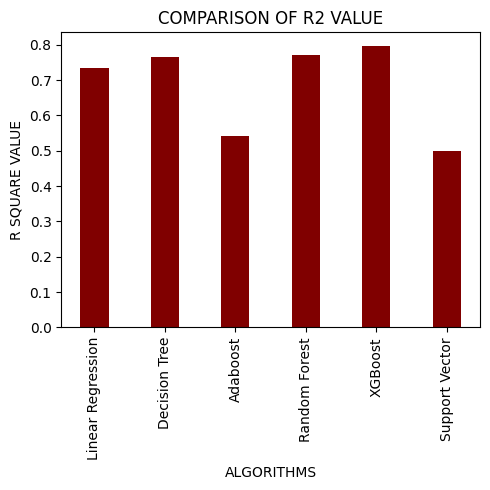

In [61]:
# R SCORE VALUE
# creating bar plot to compare the r2 value of all algorithms
data = {'Linear Regression':r2_LG, 'Decision Tree':r2_CLF, 'Adaboost':r2_ADA,
        'Random Forest':r2_RF, 'XGBoost':r2_XGB, 'Support Vector':r2_SVR}

names = list(data.keys())
values = list(data.values())
  
plt.xticks(rotation=90)
plt.bar(names, values, color ='maroon', width = 0.4)
plt.xlabel("ALGORITHMS")
plt.ylabel("R SQUARE VALUE")
plt.title("COMPARISON OF R2 VALUE")
plt.show()

TASK 4.5: Select the best possible model

In [ ]:
# from the comaprisons, we can observe that XGBoost is showing the best accuracy, followed by random forest

TASK 4.6: Perform Hyperparameter tuning, select best hyperparameters by using appropriate algorithms

In [62]:
from sklearn.model_selection import RepeatedKFold, GridSearchCV

In [59]:
def hyperparam(xgb_model, X_train, y_train, X_test, y_test):
    
    grid_search = GridSearchCV(estimator = xgb_model, param_grid = {'n_estimators': [50, 80, 100, 150, 200, 250, 300, 350]}, cv = 5, n_jobs = -1, verbose = 5)
    
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print(grid_search.best_estimator_)
    y_pred = grid_search.predict(X_test)
    
    mse_grid = mean_squared_error(y_test, y_pred)
    rmse_grid = np.sqrt(mse_grid)
    r2_grid = r2_score(y_test, y_pred)
    
    print('MSE: ', mse_grid)
    print('RMSE: ', rmse_grid)
    print('R2: ', r2_grid)
    return grid_search.best_estimator_, mse_grid, rmse_grid, r2_grid


hyperparam(xgb_model, X_train, y_train, X_test, y_test) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'n_estimators': 300}
0.7371451945534571
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
MSE:  1.7073203973457243
RMSE:  1.3066447096842064
R2:  0.7967514271589936


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 1.7073203973457243,
 1.3066447096842064,
 0.7967514271589936)

In [63]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': np.arange(100, 1000, 100),
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

xgb_model = XGBRegressor()
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
tune_model = random_search.fit(X_train, y_train)

best_model = tune_model.best_estimator_
tune_model_pred = best_model.predict(X_test)

In [64]:
print('After Hyperparameter tuning on XGB Regressor with Random Search: ')
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse_search = mean_squared_error(y_test, tune_model_pred)
print("Mean Squared Error (MSE):", mse_search)

# Calculate Root Mean Squared Error (RMSE)
rmse_search = np.sqrt(mse_search)
print("Root Mean Squared Error (RMSE):", rmse_search)

# Calculate R-squared (R²) - coefficient of determination
r2_search= r2_score(y_test, tune_model_pred)
print("R-squared (R²):", r2_search)

After Hyperparameter tuning on XGB Regressor with Random Search: 
Mean Squared Error (MSE): 1.6875699347396644
Root Mean Squared Error (RMSE): 1.2990650232916228
R-squared (R²): 0.7991026281074929


TASK 7: Come up with the best possible model accuracy.

In [65]:
print("Accuracy of XGBoost model: ",(r2_search*100));

Accuracy of XGBoost model:  79.91026281074929


In [66]:
y_test

844632     5.877007
844634     5.834928
844635     5.844819
844636     4.255045
844637     6.331217
             ...   
979710     0.000000
979709     0.000000
979708     0.000000
979734     0.000000
1074782    8.092007
Name: amount_in_usd, Length: 214957, dtype: float64

In [72]:
np.array(tune_model_pred)

array([5.8814178 , 5.7430415 , 5.8808665 , ..., 0.13038415, 0.13038415,
       2.781725  ], dtype=float32)

In [74]:
np.expm1(5.834928)   # base e  --- TEST DATA

341.0401062760328

In [75]:
np.expm1(5.7430415)

311.01195363242505